In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.1.0'

In [3]:
%pip install qiskit[visualization]==1.0.2


   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   --------- ------------------------------ 0.9/4.1 MB 20.0 MB/s eta 0:00:01
   --------------------- ------------------ 2.2/4.1 MB 23.5 MB/s eta 0:00:01
   -------------------------------- ------- 3.3/4.1 MB 23.8 MB/s eta 0:00:01
   ---------------------------------------- 4.1/4.1 MB 23.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 20.9 MB/s eta 0:00:01
   ------- -------------------------------- 2.2/11.5 MB 28.1 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.5 MB 24.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.5 MB 24.3 MB/s eta 0:00:01
   ------------------ --------------------- 5.4/11.5 MB 22.9 MB/s eta 0:00:01
   --------

  You can safely remove it manually.


In [6]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

### Install the other required packages as well

%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install prototype-zne
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
    --------------------------------------- 0.1/9.5 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.5 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.5 MB 9.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/9.5 MB 11.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.5 MB 12.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.5 MB 11.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.5 MB 12.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.4/9.5 MB 11.6 MB/s eta 0:00:01
   ------------------ --------------------- 4.4/9.5 MB 11.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/9.5 MB 9.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.6/9.5 MB 8.7 MB/s eta 0:00:01
   -----------------

  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\Chris\AppData\Local\Temp\pip-req-build-967tk0j6'


In [8]:
%set_env QXToken=bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a

### Imports

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qc_grader.challenges.iqc_2024 import grade_lab0_ex1

env: QXToken=bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a


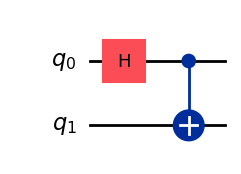

In [9]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [11]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')



### Write your code below here ###
### Follow the same naming convention we used above
XX = SparsePauliOp('XX')
IZ = SparsePauliOp('IZ')
XI = SparsePauliOp('XI')



## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [12]:
# Submit your answer using following code

grade_lab0_ex1(observables)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [13]:
# Set up the Estimator
estimator = Estimator(backend=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

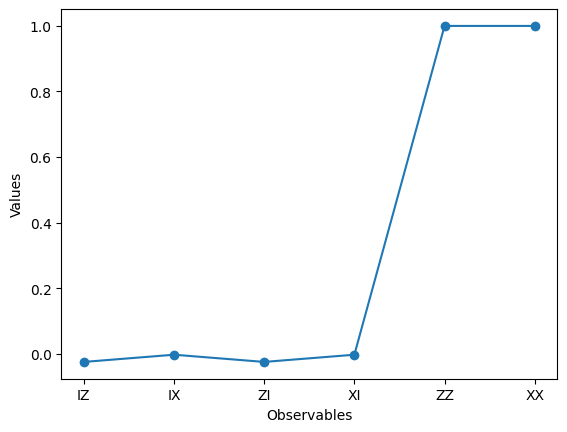

In [14]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

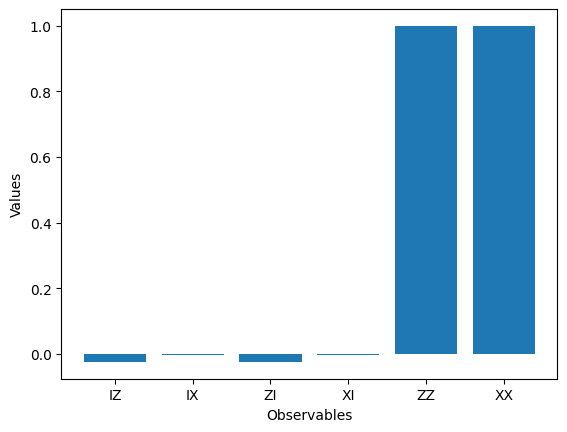

In [15]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()